<a href="https://colab.research.google.com/github/yuukimotai/GA4_QABot/blob/main/GA4_QA_bot_trans_learned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "drive/MyDrive/nlp_dataset/kftt-data-1.0/data/tok/"
with open(path + 'kyoto-dev.ja', 'r') as f:
  origin_ja = f.read()

In [4]:
import pickle

hiragana = "ぁあぃいぅうぇえぉおかがきぎくぐけげこごさざしじすずせぜそぞ\
ただちぢっつづてでとどなにぬねのはばぱひびぴふぶぷへべぺほぼぽ\
まみむめもゃやゅゆょよらりるれろゎわゐゑをん"

katakana = "ァアィイゥウェエォオカガキギクグケゲコゴサザシジスズセゼソゾ\
タダチヂッツヅテデトドナニヌネノハバパヒビピフブプヘベペホボポ\
マミムメモャヤュユョヨラリルレロヮワヰヱヲンヴ"

chars = hiragana + katakana

for char in origin_ja:  # ひらがな、カタカナ以外でコーパスに使われている文字を追加
    if char not in chars:
        chars += char

chars += "\t\n"  # タブと改行を追加

chars_list = sorted(list(chars))  # 文字列をリストに変換してソートする
print(chars_list)
print(len(chars_list))

with open("kana_chars.pickle", mode="wb") as f:  # pickleで保存
    pickle.dump(chars_list, f)

['\t', '\n', '\n', ' ', '%', '&', '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', 'A', 'B', 'C', 'D', 'E', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'Y', '_', 'a', 'd', 'e', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'y', 'ā', '―', '※', '\u3000', '、', '。', '々', '「', '」', '『', '』', '〔', '〕', 'ぁ', 'あ', 'ぃ', 'い', 'ぅ', 'う', 'ぇ', 'え', 'ぉ', 'お', 'か', 'が', 'き', 'ぎ', 'く', 'ぐ', 'け', 'げ', 'こ', 'ご', 'さ', 'ざ', 'し', 'じ', 'す', 'ず', 'せ', 'ぜ', 'そ', 'ぞ', 'た', 'だ', 'ち', 'ぢ', 'っ', 'つ', 'づ', 'て', 'で', 'と', 'ど', 'な', 'に', 'ぬ', 'ね', 'の', 'は', 'ば', 'ぱ', 'ひ', 'び', 'ぴ', 'ふ', 'ぶ', 'ぷ', 'へ', 'べ', 'ぺ', 'ほ', 'ぼ', 'ぽ', 'ま', 'み', 'む', 'め', 'も', 'ゃ', 'や', 'ゅ', 'ゆ', 'ょ', 'よ', 'ら', 'り', 'る', 'れ', 'ろ', 'ゎ', 'わ', 'ゐ', 'ゑ', 'を', 'ん', 'ァ', 'ア', 'ィ', 'イ', 'ゥ', 'ウ', 'ェ', 'エ', 'ォ', 'オ', 'カ', 'ガ', 'キ', 'ギ', 'ク', 'グ', 'ケ', 'ゲ', 'コ', 'ゴ', 'サ', 'ザ', 'シ', 'ジ', 'ス', 'ズ', 'セ', 'ゼ', 'ソ', 'ゾ', 'タ', 'ダ', 'チ', 'ヂ', 'ッ', 'ツ', 'ヅ', 'テ', 'デ', 'ト', 'ド', 'ナ', '

In [5]:
import pickle

with open('kana_chars.pickle', mode='rb') as f:
    chars_list = pickle.load(f)
print(chars_list)

def is_invalid(message):
    is_invalid =False
    for char in message:
        if char not in chars_list:
            is_invalid = True
    return is_invalid

['\t', '\n', '\n', ' ', '%', '&', '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', 'A', 'B', 'C', 'D', 'E', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'Y', '_', 'a', 'd', 'e', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'y', 'ā', '―', '※', '\u3000', '、', '。', '々', '「', '」', '『', '』', '〔', '〕', 'ぁ', 'あ', 'ぃ', 'い', 'ぅ', 'う', 'ぇ', 'え', 'ぉ', 'お', 'か', 'が', 'き', 'ぎ', 'く', 'ぐ', 'け', 'げ', 'こ', 'ご', 'さ', 'ざ', 'し', 'じ', 'す', 'ず', 'せ', 'ぜ', 'そ', 'ぞ', 'た', 'だ', 'ち', 'ぢ', 'っ', 'つ', 'づ', 'て', 'で', 'と', 'ど', 'な', 'に', 'ぬ', 'ね', 'の', 'は', 'ば', 'ぱ', 'ひ', 'び', 'ぴ', 'ふ', 'ぶ', 'ぷ', 'へ', 'べ', 'ぺ', 'ほ', 'ぼ', 'ぽ', 'ま', 'み', 'む', 'め', 'も', 'ゃ', 'や', 'ゅ', 'ゆ', 'ょ', 'よ', 'ら', 'り', 'る', 'れ', 'ろ', 'ゎ', 'わ', 'ゐ', 'ゑ', 'を', 'ん', 'ァ', 'ア', 'ィ', 'イ', 'ゥ', 'ウ', 'ェ', 'エ', 'ォ', 'オ', 'カ', 'ガ', 'キ', 'ギ', 'ク', 'グ', 'ケ', 'ゲ', 'コ', 'ゴ', 'サ', 'ザ', 'シ', 'ジ', 'ス', 'ズ', 'セ', 'ゼ', 'ソ', 'ゾ', 'タ', 'ダ', 'チ', 'ヂ', 'ッ', 'ツ', 'ヅ', 'テ', 'デ', 'ト', 'ド', 'ナ', '

In [6]:
import numpy as np

# インデックスと文字で辞書を作成
char_indices = {}  # 文字がキーでインデックスが値
for i, char in enumerate(chars_list):
    char_indices[char] = i
indices_char = {}  # インデックスがキーで文字が値
for i, char in enumerate(chars_list):
    indices_char[i] = char

seperator = " "
sentence_list = origin_ja.split(seperator)
print(sentence_list)
sentence_list.pop()
sentence_list = [x+seperator for x in sentence_list]

max_sentence_length = 128  # 文章の最大長さ。これより長い文章はカットされる。
sentence_list = [sentence for sentence in sentence_list if len(sentence) <= max_sentence_length]  # 長すぎる文章のカット

n_char = len(chars_list)  # 文字の種類の数
n_sample = len(sentence_list) - 1  # サンプル数

x_sentences = []  # 入力の文章
t_sentences = []  # 正解の文章
for i in range(n_sample):
    x_sentences.append(sentence_list[i])
    t_sentences.append("\t" + sentence_list[i+1] + "\n")  # 正解は先頭にタブ、末尾に改行を加える
max_length_x = max_sentence_length  # 入力文章の最大長さ
max_length_t = max_sentence_length + 2  # 正解文章の最大長さ

x_encoder = np.zeros((n_sample, max_length_x, n_char), dtype=np.bool_)  # encoderへの入力
x_decoder = np.zeros((n_sample, max_length_t, n_char), dtype=np.bool_)  # decoderへの入力
t_decoder = np.zeros((n_sample, max_length_t, n_char), dtype=np.bool_)  # decoderの正解

for i in range(n_sample):
    x_sentence = x_sentences[i]
    t_sentence = t_sentences[i]
    for j, char in enumerate(x_sentence):
        x_encoder[i, j, char_indices[char]] = 1  # encoderへの入力をone-hot表現で表す
    for j, char in enumerate(t_sentence):
        x_decoder[i, j, char_indices[char]] = 1  # decoderへの入力をone-hot表現で表す
        if j > 0:  # 正解は入力より1つ前の時刻のものにする
            t_decoder[i, j-1, char_indices[char]] = 1

print(x_encoder.shape)

['臨済', '宗', '（', '臨濟', '宗', '、', 'りんざい', 'しゅう', '）', 'は', '、', '中国', '禅', '五', '家', '七', '宗', '（', 'ご', 'け', 'しち', 'しゅう', '）', '（', '臨済', '、', '潙仰', '宗', '、', '曹洞', '宗', '、', '雲門', '宗', '、', '法眼', '宗', '）', 'の', 'ひと', 'つ', 'で', '、', '唐', 'の', '臨済', '義', '玄', '（', '？', '-867', '年', '）', 'を', '宗祖', 'と', 'する', '。\n彼', 'は', '『', '喝', 'の', '臨済', '』', '『', '臨済', '将軍', '』', 'の', '異名', 'で', '知', 'ら', 'れ', '、', '豪放', 'な', '家風', 'を', '特徴', 'と', 'し', 'て', '中国', '禅', '興隆', 'の', '頂点', 'を', '極め', 'た', '。\n公案', 'に', '参究', 'する', 'こと', 'に', 'よ', 'り', '見性', 'し', 'よ', 'う', 'と', 'する', '看話', '禅', '（', 'かんな', 'ぜん', '）', 'で', '、', 'ただ', '座禅', 'する', '曹洞', '宗', 'の', '黙照', '禅', 'と', 'は', 'この', '点', 'が', '異な', 'る', '。\n中国', 'に', 'おけ', 'る', '臨済', '宗\n臨済', '宗', 'は', '、', 'その', '名', 'の', '通り', '、', '会昌', 'の', '廃仏', '後', '、', '唐', '末', 'の', '宗祖', '臨済', '義', '玄', 'に', '始ま', 'る', '。\n臨済', 'は', '黄檗', '希', '運', 'の', '弟子', 'で', 'あ', 'り', '、', '河北', '省', 'の', '地', 'を', '拠点', 'と', 'し', '、', '新興', 'の', '藩鎮', '勢力', 'で', 'あ',

In [7]:
batch_size = 32
epochs = 300
n_mid = 56

In [ ]:
encoder_input = Input(shape=(None, n_char))
encoder_mask = Masking(mask_value=0)  # 全ての要素が0であるベクトルの入力は無視する
encoder_masked = encoder_mask(encoder_input)
encoder_lstm = GRU(n_mid, dropout=0.4, recurrent_dropout=0.4, return_state=True)  # dropoutを設定し、ニューロンをランダムに無効にする
encoder_output, encoder_state_h = encoder_lstm(encoder_masked)

decoder_input = Input(shape=(None, n_char))
decoder_mask = Masking(mask_value=0)  # 全ての要素が0であるベクトルの入力は無視する
decoder_masked = decoder_mask(decoder_input)
decoder_lstm = GRU(n_mid, dropout=0.4, recurrent_dropout=0.4, return_sequences=True, return_state=True)  # dropoutを設定
decoder_output, _ = decoder_lstm(decoder_masked, initial_state=encoder_state_h)  # encoderの状態を初期状態にする
decoder_dense = Dense(n_char, activation='softmax')
decoder_output = decoder_dense(decoder_output)

model = Model([encoder_input, decoder_input], decoder_output)

model.compile(loss="categorical_crossentropy", optimizer="rmsprop")
print(model.summary())

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model, load_model
from keras.layers import Dense, GRU, Input, Masking

early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

loaded_model = load_model('initial_model.h5')

history = loaded_model.fit([x_encoder, x_decoder], t_decoder,
                     batch_size=batch_size,
                     epochs=epochs,
                     validation_split=0.2,  # 10%は検証用
                     callbacks=[early_stopping])

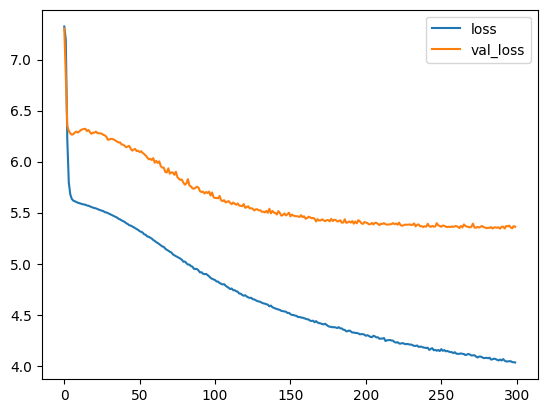

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(val_loss)), val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint


# 初期モデルのロード
base_model = load_model('initial_model.h5')
for layer in base_model.layers:
    print(layer.name)

# 正しいレイヤー名を指定する
encoder_state_h = base_model.get_layer('gru_2').output[1]
decoder_input = base_model.get_layer('input_5').output

# 新しいモデルの定義
new_decoder_gru = GRU(n_mid, dropout=0.4, recurrent_dropout=0.4, return_sequences=True, return_state=True)
new_decoder_output, _ = new_decoder_gru(decoder_input, initial_state=encoder_state_h)
new_decoder_dense = Dense(n_char, activation='softmax')(new_decoder_output)

transed_model = Model(inputs=base_model.inputs, outputs=new_decoder_dense)
transed_model.compile(loss="categorical_crossentropy", optimizer="rmsprop")

early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# 新しいモデルのトレーニング
history = new_model.fit([x_encoder, x_decoder], t_decoder,
                        batch_size=32,
                        epochs=50,
                        validation_split=0.2,
                        callbacks=[early_stopping])
